Bond or fixed income securities and stock are two widely used investment vehicles.
Thus, they deserve a thorough discussion. Before touching upon bond or stock
valuation, we have to discuss interest rate and its related concepts, such as
* Annual Percentage Rate (APR),
* Effective Annual Rate (EAR), 
* Compounding frequency,
* How to convert one effective rate to another one, 
* The term structure of interest rate,
* How to estimate the selling price of a regular bond, 
* How to use the so-called discount dividend model to estimate the price of a stock, and so on. 

In particular, this file will cover the following topics:
    
* Introduction to interest rates
* Conversion between various effective rates, APR
* The term structure of interest rates
* Bond evaluation and YTM
* Credit rating versus default spread
* Definition of duration and modified duration
* Stock evaluation, total returns, capital gain yield, and dividend yield
* A new data type – dictionary

### Introduction to interest rates

There is no doubt that interest rates play an important role in our economy. When the
economy is expanding, interest rates tend to go high since the high demand of capital
would push up borrowing rates. In addition, inflation might go up as well.

When this is happening, central banks will do their best to control the inflation at an appropriate
level. One tool to fight the potential inflation hike is to increase banks' lending rates.
On the other hand, the bond price is negatively correlated with interest rates.

There is a good chance that many of us are confused with the
difference between simple interest and compound interest. Simple interest does
not consider interest on interest while compound interest rate does. 

Assume that
we borrow `$1,000` today for 10 years. What are the future values at the end of each
year if the annual rate is `8%`? Assume that this annual rate is both the simple and
compounded interest rates. Their corresponding formulae are shown

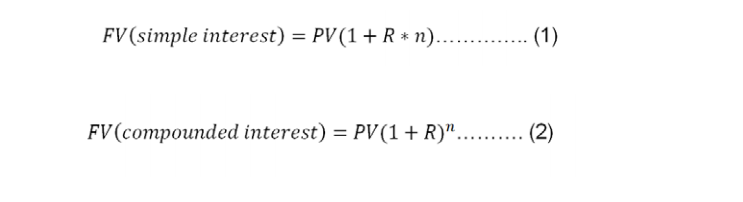

Here, 
* `PV` is the loan today,
* `R` is the period rate, and 
* `n` is the number of periods. 

Thus, those two future values will be `$1,800` and `$2,158.93`.

The graphic representation of the principal, the future values with a simple interest rate,
and the future values with a compound interest rate are shown in the diagram which
follows. 

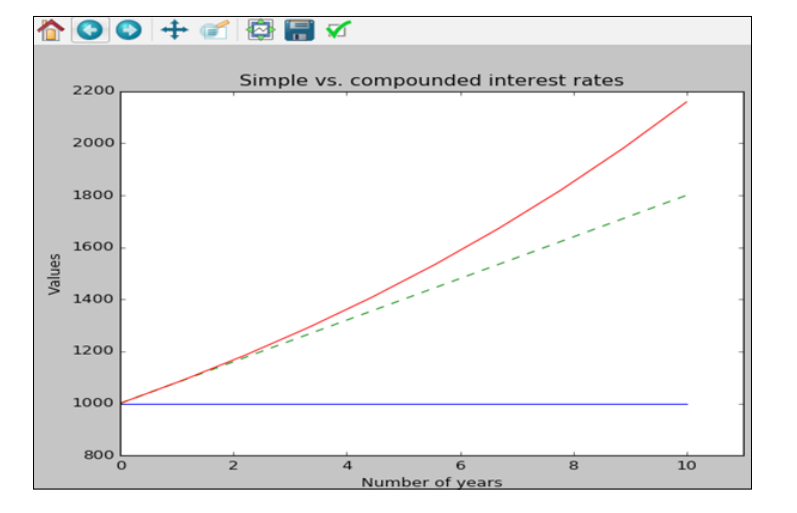

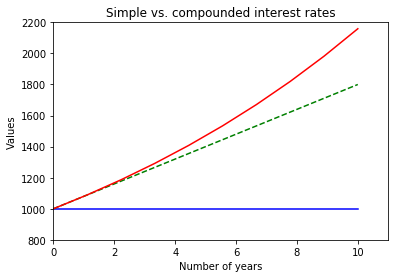

In [1]:
# Generating above graph
# graphic representation of a principal, simple interest payment, and the future values:

import numpy as np
from matplotlib.pyplot import *
from pylab import *

pv=1000
r=0.08
n=10
t=linspace(0,n,n)
y1=np.ones(len(t))*pv # a horizontal line
y2=pv*(1+r*t)
y3=pv*(1+r)**t

title('Simple vs. compounded interest rates')
xlabel('Number of years')
ylabel('Values')
xlim(0,11)
ylim(800,2200)
plot(t, y1, 'b-')
plot(t, y2, 'g--')
plot(t, y3, 'r-')
show()

The difference between the top red line (future values with a compounded interest rate) and the middle one (future values with a simple interest rate) is interest on interest

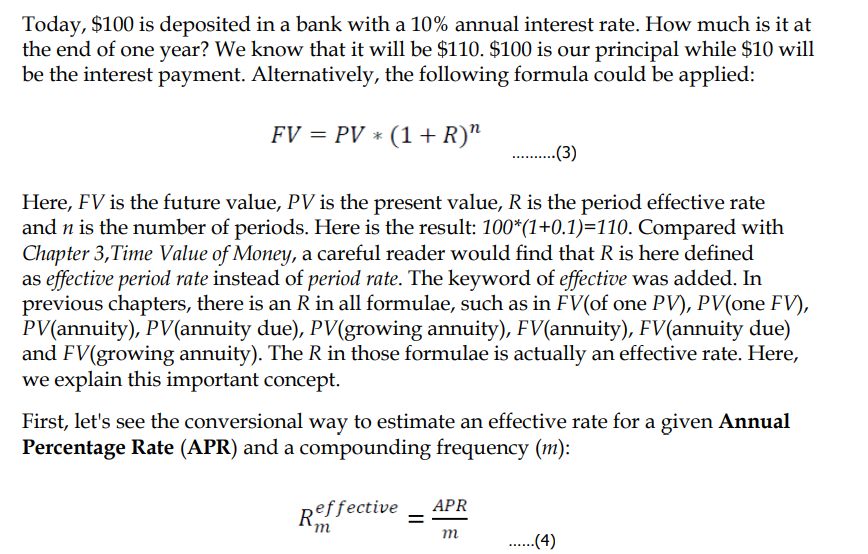

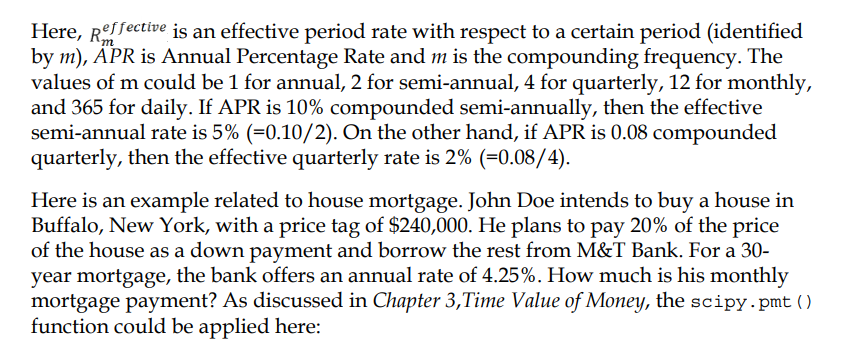

In [2]:
import scipy as sp
    
sp.pmt(0.045/12,30*12,240000*0.8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.pmt is deprecated and will be removed in SciPy 2.0.0, use numpy.pmt instead
  This is separate from the ipykernel package so we can avoid doing imports until


-972.8357948657007

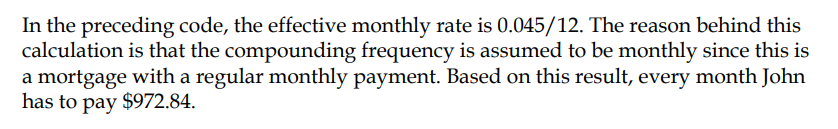

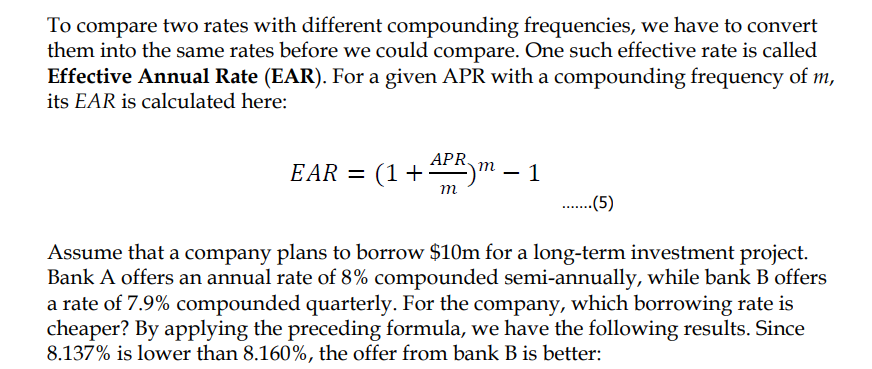

In [3]:
(1+0.08/2)**2-1

0.08160000000000012

In [5]:
(1+0.079/4)**4-1

0.08137134208625363

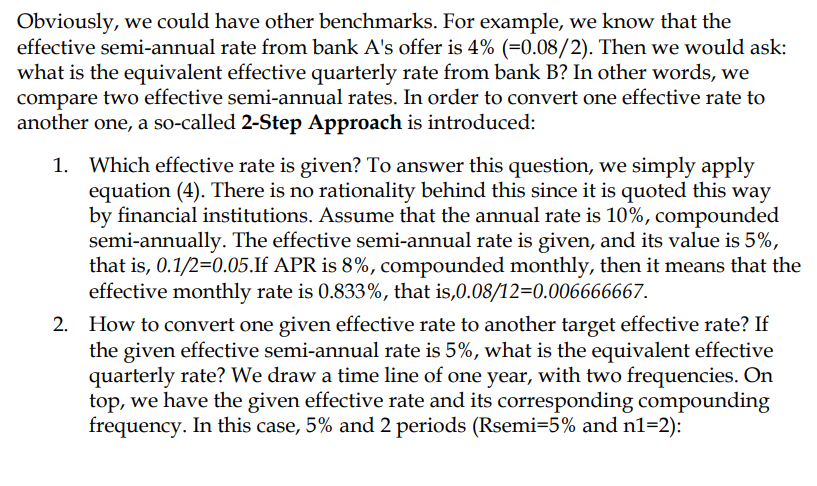

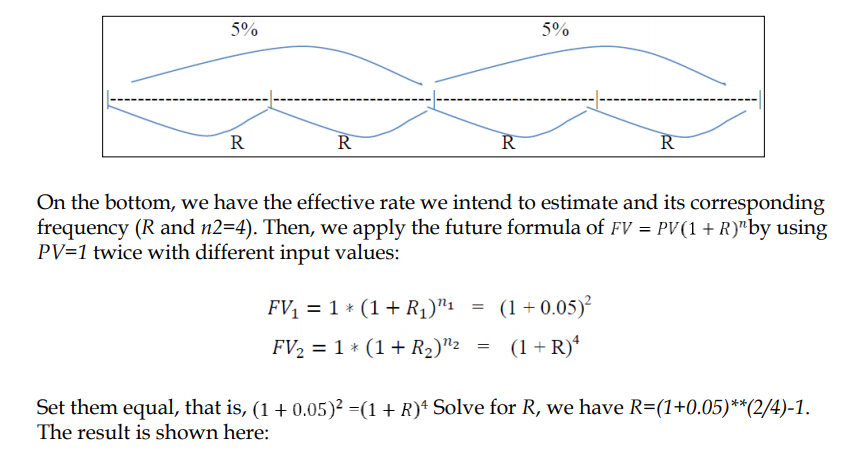

In [6]:
(1+0.05)**(2/4)-1

0.02469507659595993

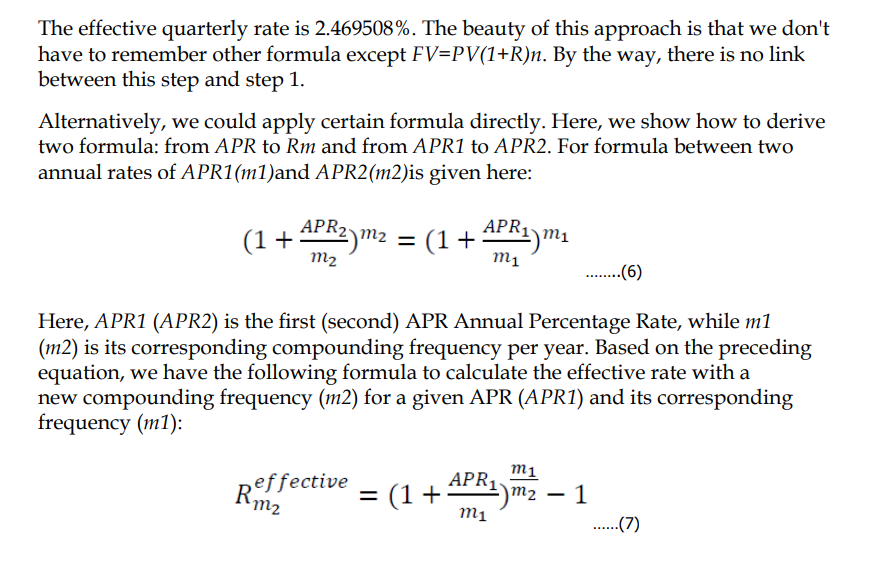

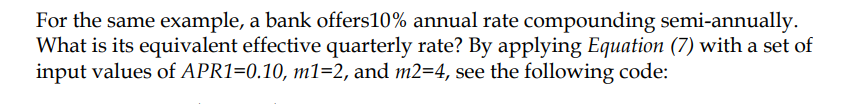

In [7]:
(1+0.10/2)**(2/4)-1

0.02469507659595993

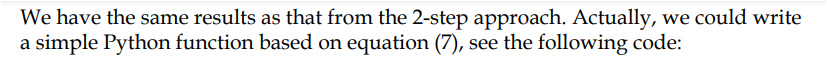

In [9]:
def APR2Rm(APR1,m1,m2):
    return (1+APR1/m1)**(m1/m2)-1

In [10]:
APR2Rm(0.1,2,4)

0.02469507659595993

In [11]:
APR2Rm(0.08,2,12)

0.006558196936559346

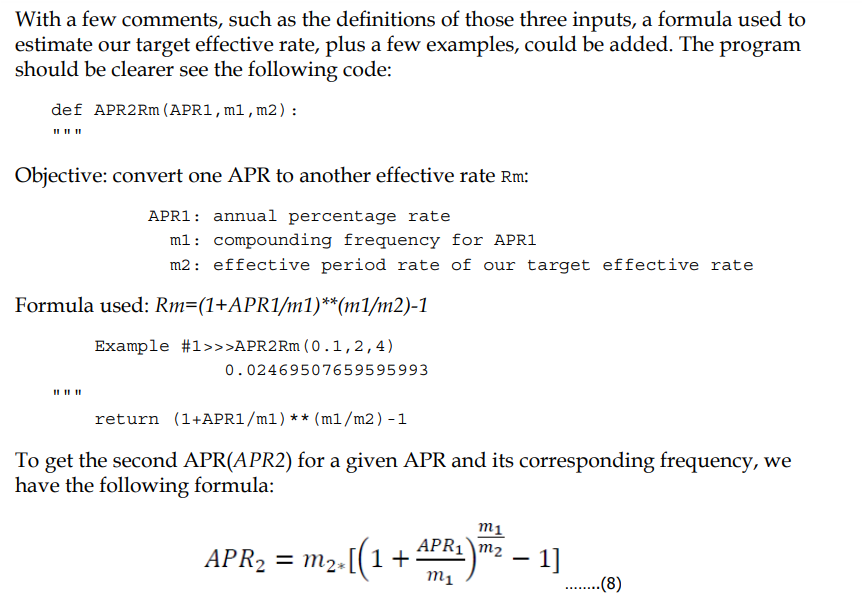

By applying `equation (8)`, we have a result for APR2:

In [12]:
Rs=(1+0.05/2)**(2/12)-1
Rs*2

0.008247830930288469

In [13]:
def APR2APR(APR1,m1,m2):
    return m2*((1+APR1/m1)**(m1/m2)-1)

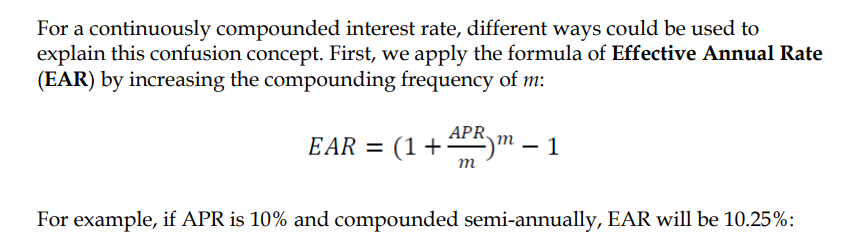

In [14]:
(1+0.1/2)**2-1

0.10250000000000004

Since this function is quite simple, we could write a Python function instead

In [15]:
def EAR_f(APR,m):
    return (1+APR/m)**m-1

Next, assume that the APR is `10%` and let's increase the compounding frequency,

In [16]:
import numpy as np

d=365
h=d*24
m=h*60
s=m*60
ms=s*1000
x=np.array([1,2,4,12,d,h,m,s,ms])
APR=0.1

for i in x:
    print(EAR_f(APR,i))

0.10000000000000009
0.10250000000000004
0.10381289062499954
0.10471306744129683
0.10515578161623251
0.10517028727456146
0.10517090753998182
0.10517091994187133
0.10517230537146749


Actually, when the compounding frequency approaches an infinity, the limit will
be our continuously compounded rate with a formula of `EAR=exp(Rc)-1`,

In [17]:
exp(0.1)-1

0.10517091807564771

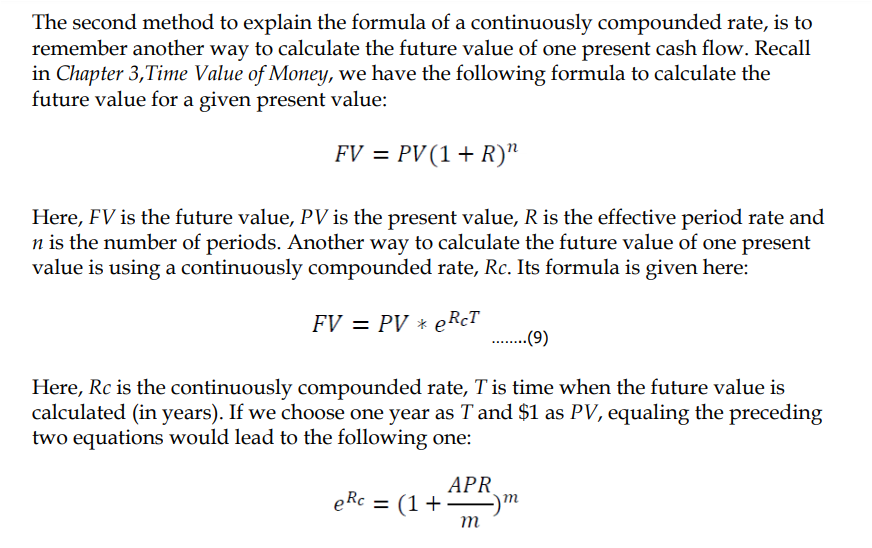

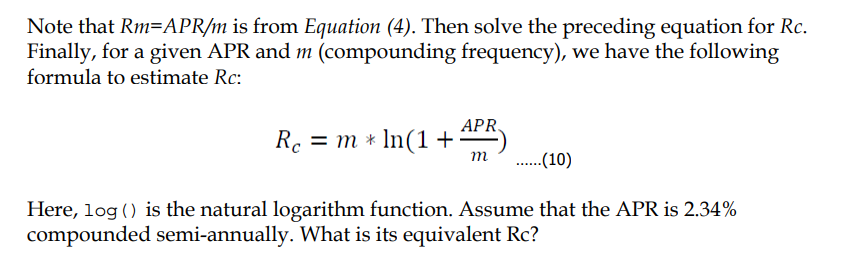

In [18]:
from math import log
2*log(1+0.0234/2)

0.023264168459415393

Alternatively, we could write a 2-line Python function based on the preceding
formula to convert an APR to Rc:

In [19]:
def APR2Rc(APR,m):
    return m*log(1+APR/m)

In [20]:
APR2Rc(0.0234,2)

0.023264168459415393

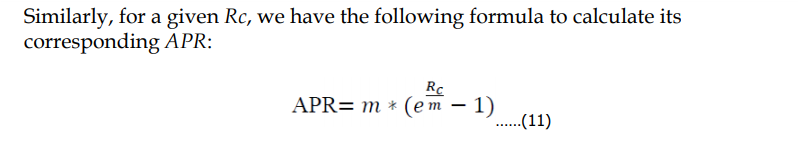

In [21]:
def Rc2APR(Rc,m):
    return m*(exp(Rc/m)-1)

In [22]:
Rc2APR(0.02,2)

0.020100334168335898

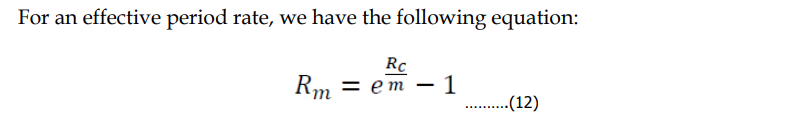

In [23]:
def Rc2Rm(Rc,m):
    return exp(Rc/m)-1

In [24]:
Rc2Rm(0.02,2)

0.010050167084167949

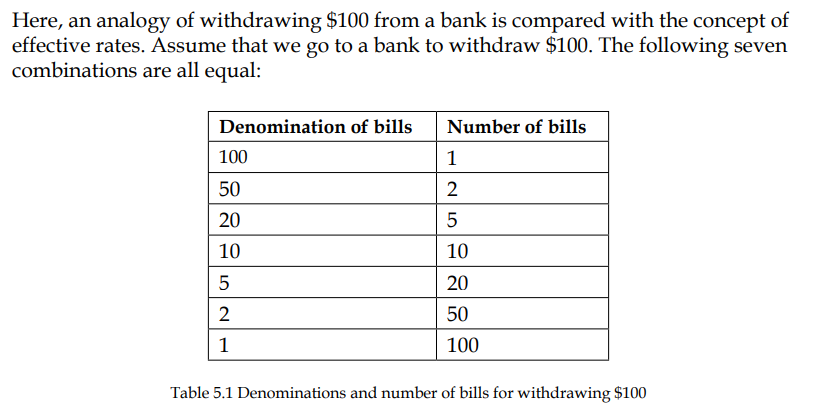

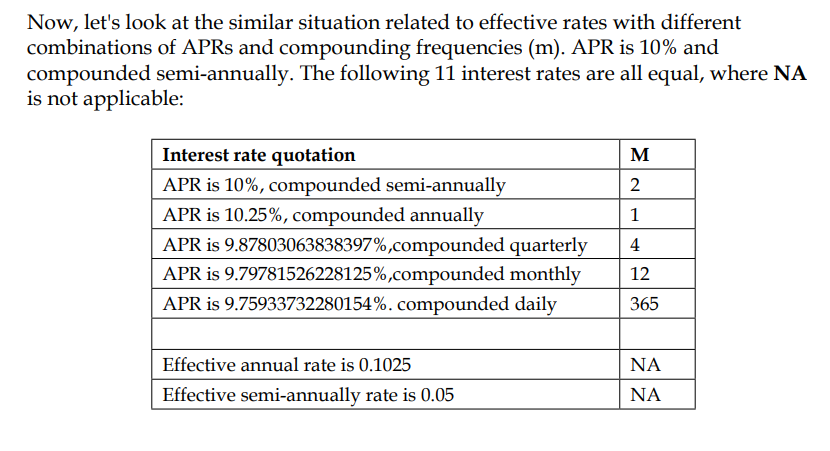

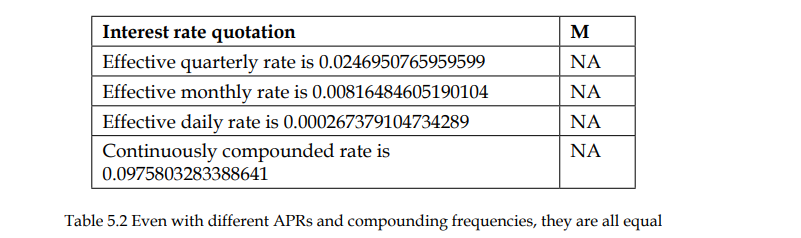

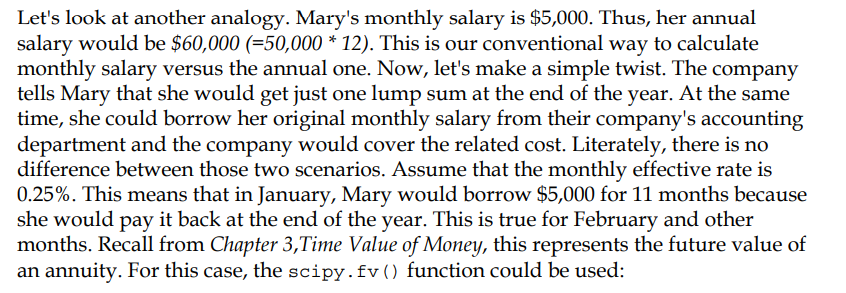

In [25]:
import scipy as sp
sp.fv(0.0025,12,5000,0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.fv is deprecated and will be removed in SciPy 2.0.0, use numpy.fv instead
  


-60831.91382701347

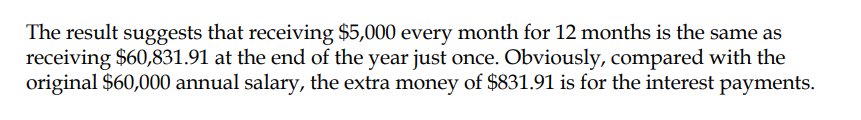

### Term structure of interest rates


The term structure of interest rates is defined as the relationship between risk-free
rate and time. A risk-free rate is usually defined as the default-free treasury rate.
From many sources, we could get the current term structure of interest rates. For
example, on `12/21/2016`, from Yahoo!Finance at http://finance.yahoo.com/
bonds, we could get the following information

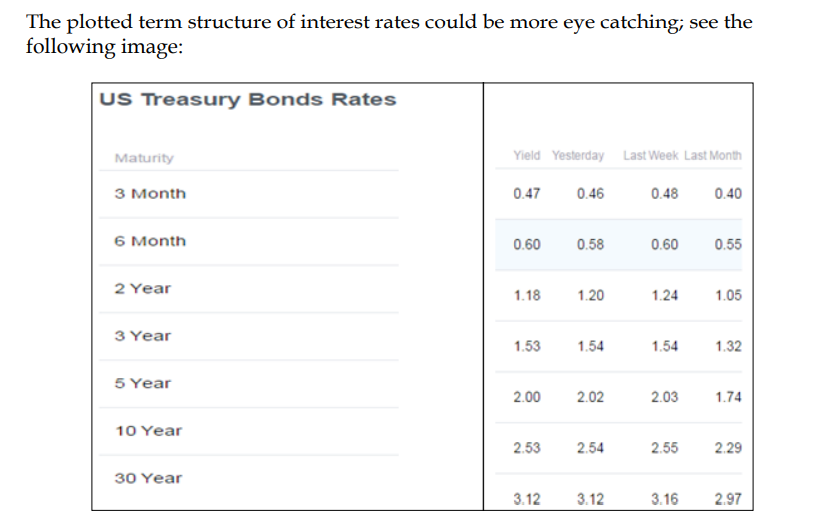

Based on the information supplied above, we have the following code to draw a so-called yield curve:

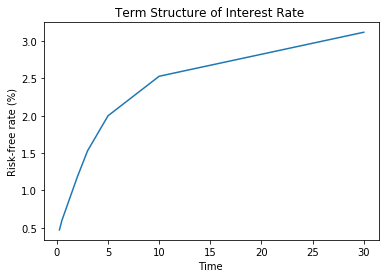

In [26]:
from matplotlib.pyplot import *

time=[3/12,6/12,2,3,5,10,30]
rate=[0.47,0.6,1.18,1.53,2,2.53,3.12]

title("Term Structure of Interest Rate ")
xlabel("Time ")
ylabel("Risk-free rate (%)")

plot(time,rate)
show()

The upward sloping's term structure means the long-term rates are higher than
the short-term rates. Since the term structure of interest rates has many missing
numbers, the function called `.interpolate()` from the **pandas module** could be
used to interpolate those values, see the following example where we have two
missing values between 2 and 6:

In [27]:
import pandas as pd
import numpy as np
x=pd.Series([1,2,np.nan,np.nan,6])
x

0    1.0
1    2.0
2    NaN
3    NaN
4    6.0
dtype: float64

In [55]:
x.interpolate() # (6-2)/3, here 3 is comes from count all missing values +1

0    1.000000
1    2.000000
2    3.333333
3    4.666667
4    6.000000
dtype: float64

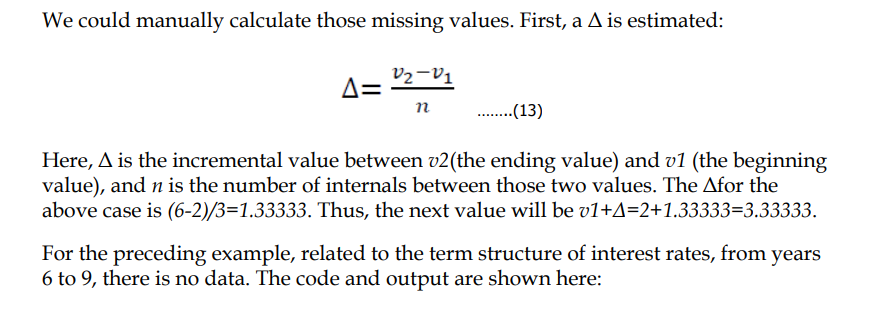

In [56]:
import pandas as pd
import numpy as np
nan=np.nan
x=pd.Series([2,nan,nan,nan,nan,2.53])
x.interpolate()

0    2.000
1    2.106
2    2.212
3    2.318
4    2.424
5    2.530
dtype: float64

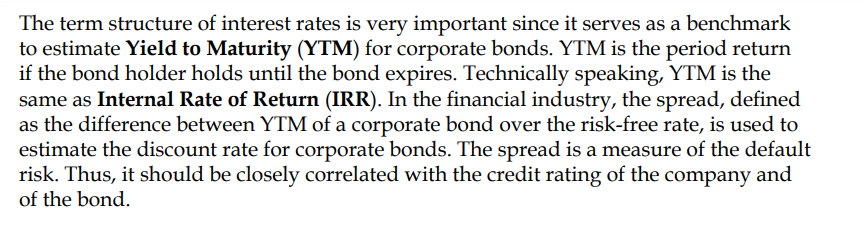

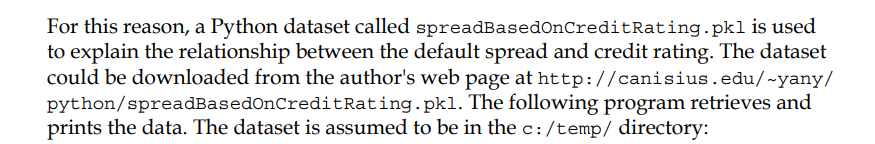

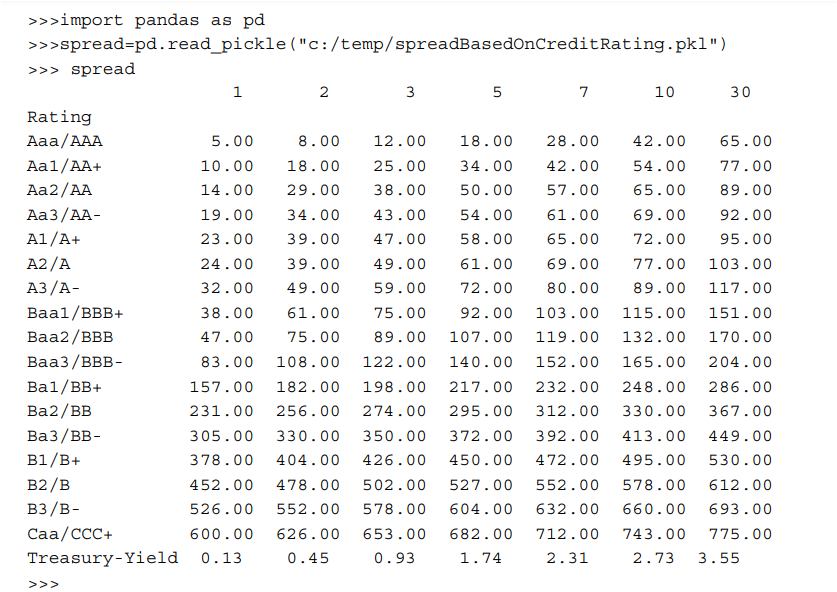

The index column is the credit rating based on both Moody's and Standard & Poor's
credit rating scales. Except for the last row, US Treasury Yield, the values in the
dataset have a unit of basis point which is worth one hundredth of `1%`. 

In other words, each value should be divided by 100 twice. For example, for an AA rated
bond, its spread on year 5 is 50 basis points, that is, `0.005 (=50/10000)`. If the risk-free
rate for a 5-year zero-coupon bond is `2%`, the corresponding rate for a corporate
bond, rated as AA, would be `2.5% (2.5%+ 0.5%)`.

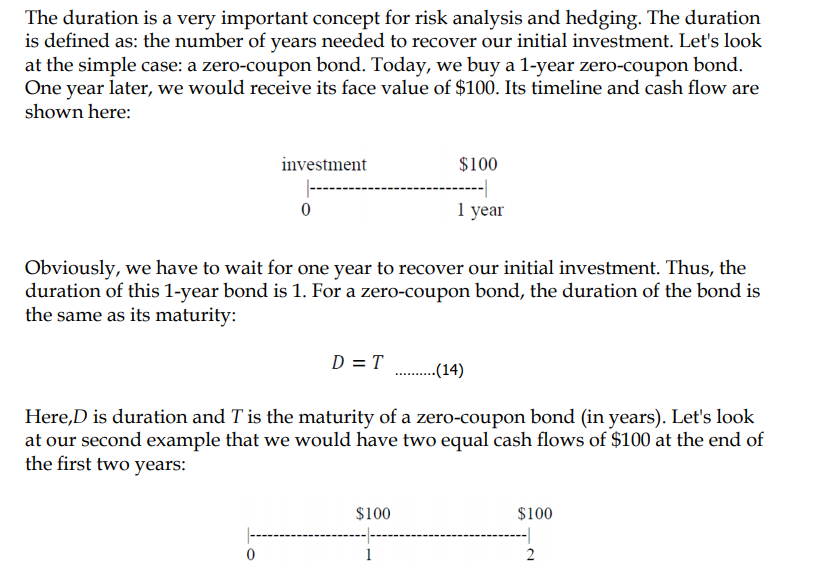

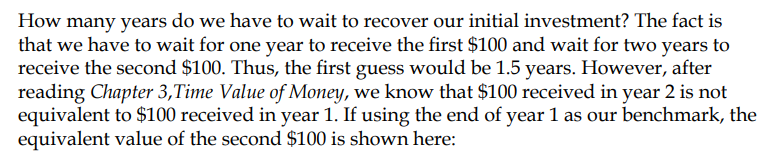

In [1]:
100/(1+0.05)

95.23809523809524

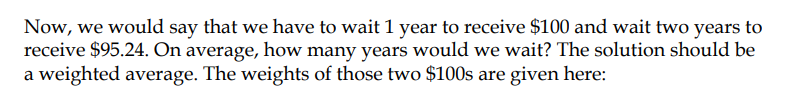

In [2]:
pv2 = 100/(1+0.05)
w1=100/(100+pv2)
w1

0.5121951219512195

In [3]:
w2= pv2/(100+pv2)
w2

0.4878048780487805

In [4]:
w1*1 + w2*2

1.4878048780487805

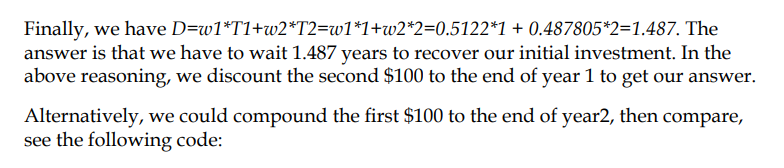

In [5]:
fv=100*(1+0.05)

In [7]:
w1=105/(100+105)
w1

0.5121951219512195

In [8]:
w2=100/(100+105)
w2

0.4878048780487805

The solution should be the same since the weights are the same as before. This
suggests that we could use any point of time to estimate the weights of those cash
flows happening at different points in time. Conventionally, the present value is
used as the benchmark:

In [9]:
pv1=100/(1+0.05)
pv2=100/(1+0.05)**2
w1= pv1/(pv1+pv2)
w1

0.5121951219512195

In [10]:
1-w1

0.4878048780487805

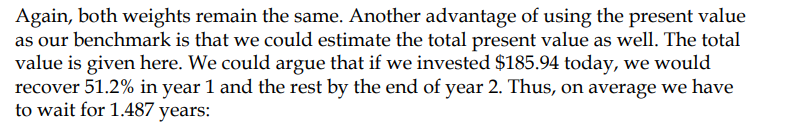

In [11]:
pv1+pv2

185.94104308390024

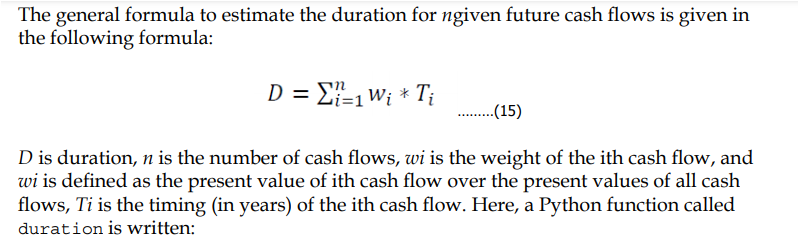

In [13]:
def duration(t,cash_flow,y):
    n=len(t)
    B,D=0,0

    for i in range(n):
        B+=cash_flow[i]*exp(-y*t[i])

    for i in range(n):
        D+=t[i]*cash_flow[i]*exp(-y*t[i])/B
    return D

In [14]:
# If we add a header, the program would be more helpful

def duration(t,cash_flow,y):
    n=len(t)
    
    B = 0 # B is the bond's present value

    for i in range(n):
        B+=cash_flow[i]*exp(-y*t[i])
    
    D=0 # D is the duration
    
    for i in range(n):
        D+=t[i]*cash_flow[i]*exp(-y*t[i])/B
    return D

### Bond evaluation

Bond is also called fixed income security. There are different types of categories.
Based on maturity, bonds could be classified into 
* short-term,
* median-term, and 
* long-term. 

For US Treasury securities, 

* T-bills are the securities issued by the Department of Treasury with a maturity less than 1 year, 
* T-notes are for government bonds beyond 1 year but less than 10 years. 
* T-bonds are treasury securities with a maturity beyond 10 years. 
* Based on coupon payments, there are zero-coupon bonds and coupon bonds.

When it is a central government's bond, we call them risk-free bonds since the central government usually has a right to print money, that is by default, free.

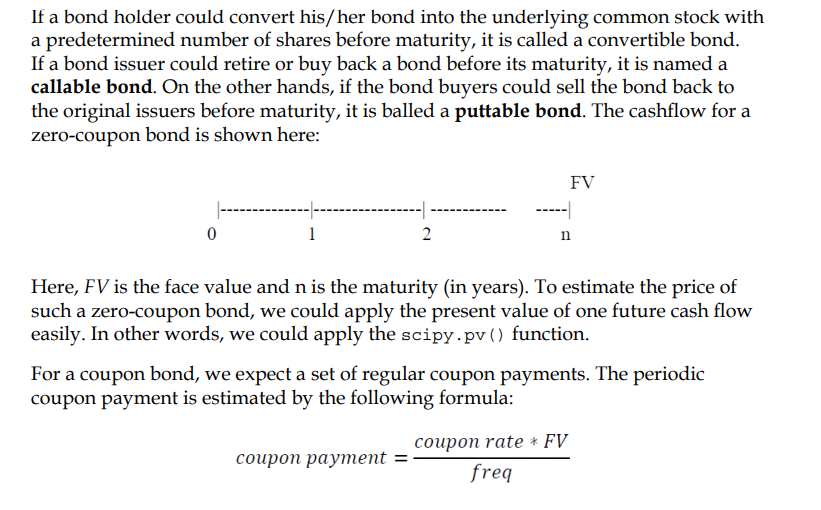

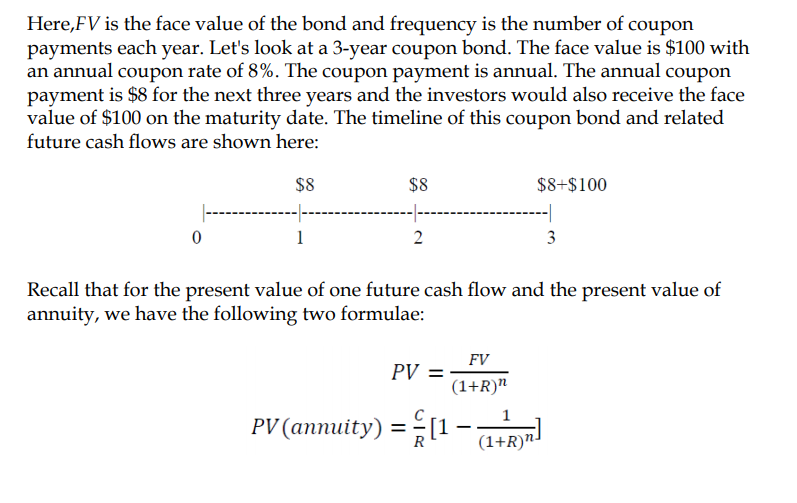

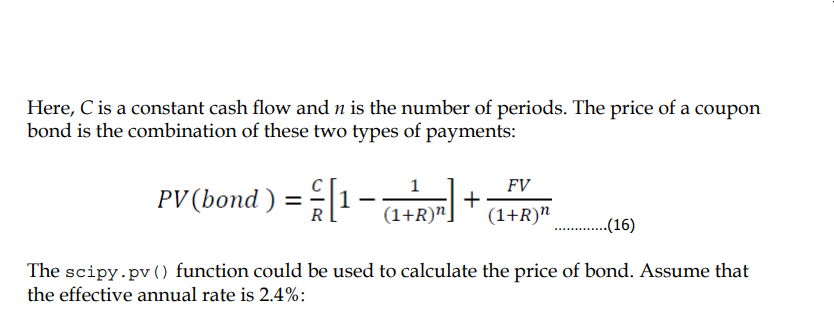

In [15]:
import scipy as sp
sp.pv(0.024,3,0.08*100,100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
  


-116.0247325897217

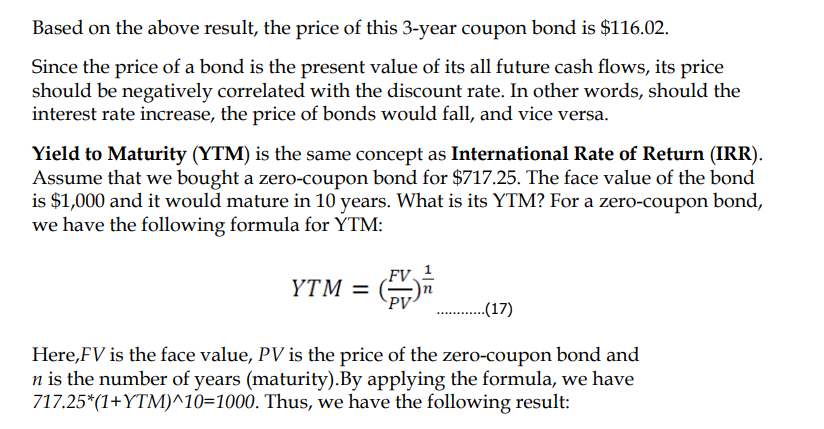

In [16]:
(1000/717.25)**(1/10)-1

0.033791469771228044

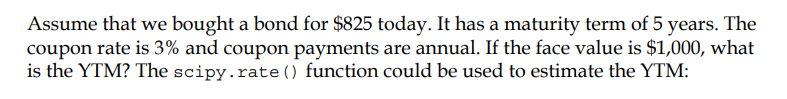

In [17]:
import scipy as sp
sp.rate(5,0.03*1000,-818,1000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.rate is deprecated and will be removed in SciPy 2.0.0, use numpy.rate instead
  


0.07498180431487073

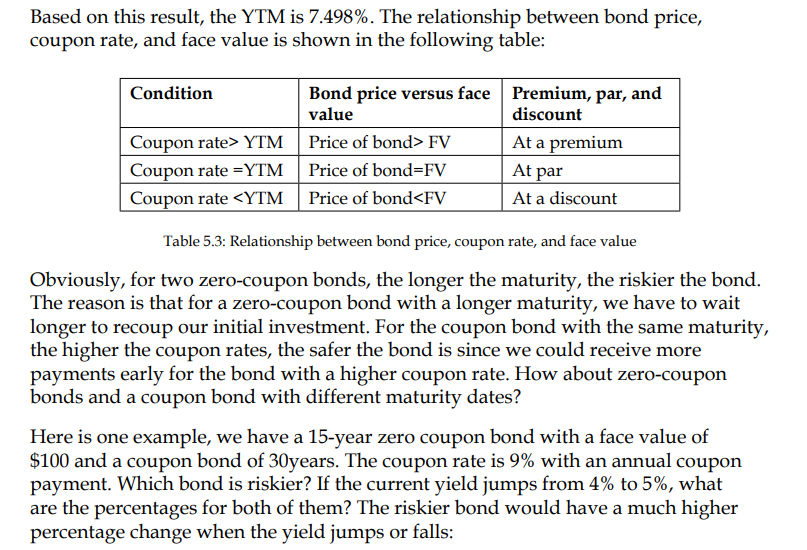

In [18]:
# for zero-coupon bond

p0=sp.pv(0.04,15,0,-100)
p1=sp.pv(0.05,15,0,-100)
(p1-p0)/p0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
  after removing the cwd from sys.path.


-0.1337153811552842

In [19]:
print(p0,p1)

55.526450271327484 48.101709809096995


In [22]:
# For the coupon bond, we have the following result:

p0=sp.pv(0.04,30,-0.09*100,-100)
p1=sp.pv(0.05,30,-0.09*100,-100)
(p1-p0)/p0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
  after removing the cwd from sys.path.


-0.13391794539315816

In [21]:
print(p0,p1)

186.46016650332245 161.48980410753134


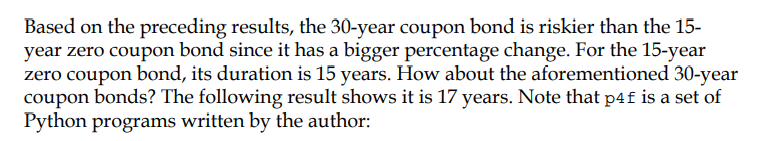

In [8]:
# Appendix E – Python program to estimate the duration for a bond

def durationBond(rate,couponRate,maturity):
    """Objective : estimte the durtion for a given bond
    
    rate : discount rate
    couponRate: coupon rate
    maturity : number of years
    
    Example 1: 
    discountRate=0.1
    couponRate=0.04
    n=4
    durationBond(rate,couponRate,n)
    3.5616941835365492
    
    Example #2
    durationBond(0.1,0.04,4)
    3.7465335177625576
    """
    import scipy as sp
    
    d=0
    n=maturity
    
    for i in sp.arange(n):
        d+=(i+1)*sp.pv(rate,i+1,0,-couponRate)
    
    d+=n*sp.pv(rate,n,0,-1)
    return d/sp.pv(rate,n,-couponRate,-1)


In [14]:
durationBond(0.1,0.04,4)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead


3.7465335177625576

In [15]:
durationBond(0.04,0.09,30)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead


15.500044012905358

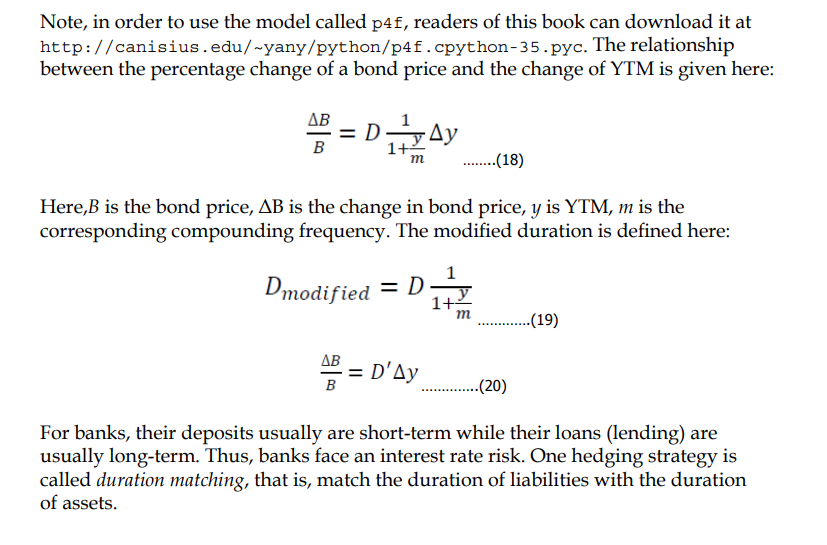

### Stock valuation

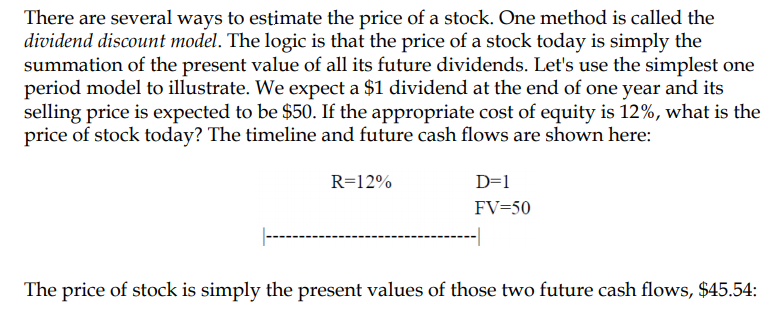

In [32]:
(1+50)/(1+0.12)

45.535714285714285

In [33]:
import scipy as sp
sp.pv(0.12,1,1+50)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
  


-45.53571428571432

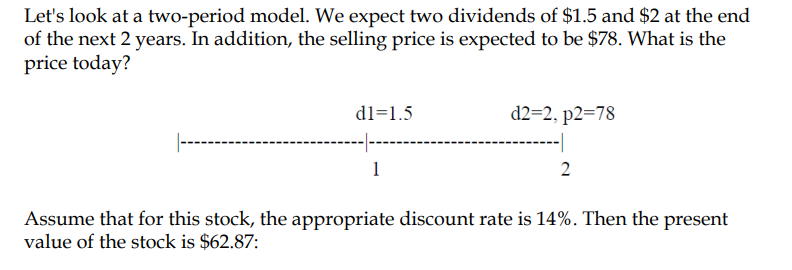

In [34]:
1.5/(1+0.14)+(2+78)/(1+0.14)**2

62.873191751308084

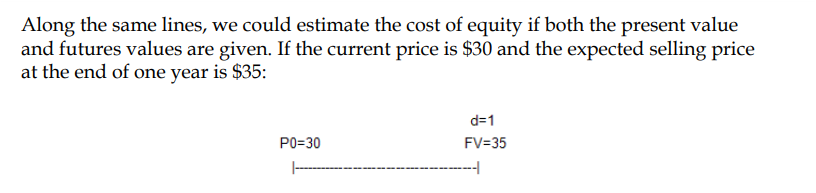

In [35]:
# Then we could estimate the total return:

(35-30+1)/30

0.2

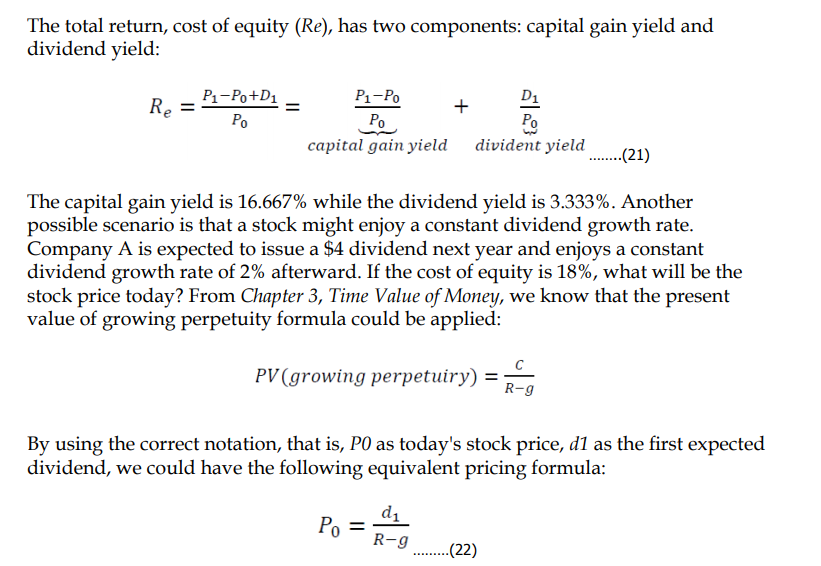

From the following results, we know that today's price should be $25:

In [36]:
4/(0.18-0.02)

25.0

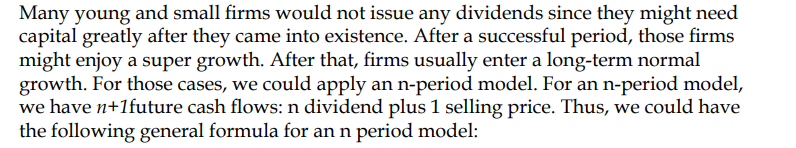

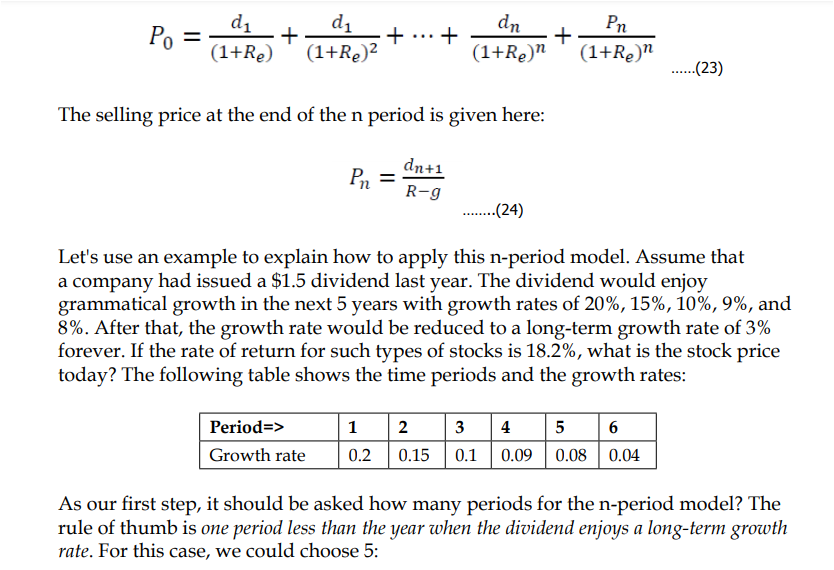

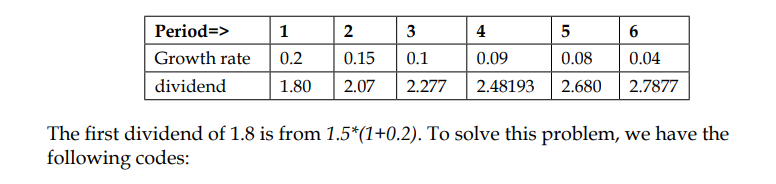

In [37]:
import scipy as sp
dividends=[1.80,2.07,2.277,2.48193,2.680,2.7877]
R=0.182
g=0.03
sp.npv(R,dividends[:-1])*(1+R)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  """


9.523317320450868

In [38]:
sp.pv(R,5,0,2.7877/(R-g))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
  """Entry point for launching an IPython kernel.


-7.949046992374841

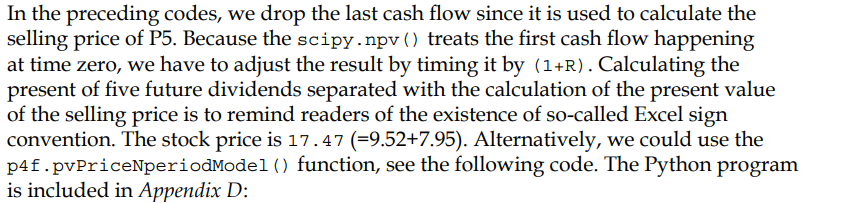

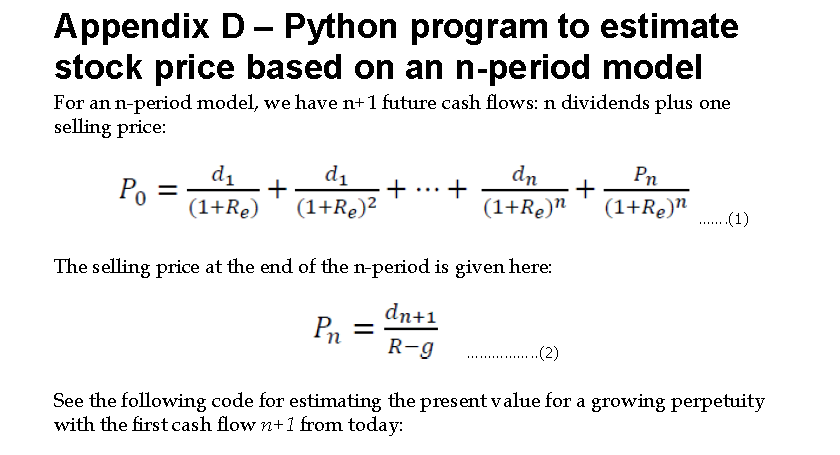

In [2]:
def pvValueNperiodModel(r,longTermGrowthRate,dividendNplus1):
    
    """Objective: estimate stock price based on an n-period model
    
    r: discount rate
    LongTermGrowhRate: long term dividend growth rate
    dividendsNpus1 : a dividend vector n + 1
    
    sellingPrice= d(n+1)/(r-g)
    where g is long term growth rate
    
    PV = d1/(1+R) + d2/(1+R)**2 + .... + dn/(1+R)**n + sellingPrice/(1+R)**n
    
    Example #1: 
    r=0.182
    g=0.03
    d=[1.8,2.07,2.277,2.48193,2.68,2.7877]
    pvValueNperiodModel(r,g,d)
    17.472364312825711
    """
    
    import scipy as sp
    d=dividendNplus1
    n=len(d)-1
    g=longTermGrowthRate
    pv=sp.npv(r,d[:-1])*(1+r)
    sellingPrice=d[n]/(r-g)
    pv+=sp.pv(r,n,0,-sellingPrice)
    return pv

In [3]:
r=0.182
g=0.03
d=[1.8,2.07,2.277,2.48193,2.68,2.7877]
pvValueNperiodModel(r,g,d)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead


17.47236431282571

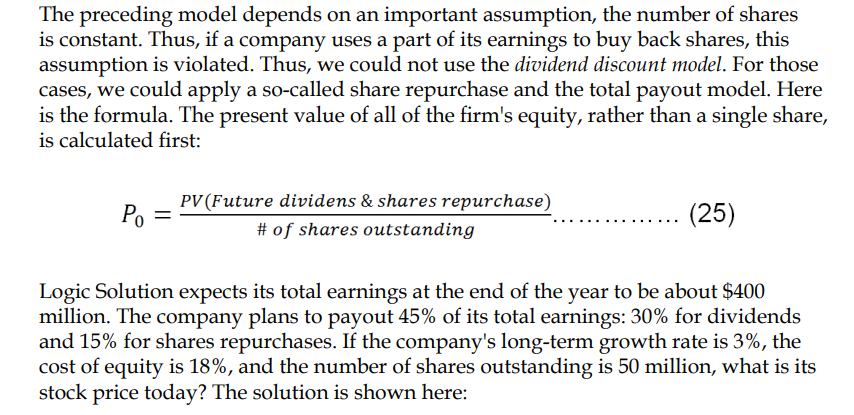

In [16]:
 400*0.45/(0.18-0.03)/50

24.0

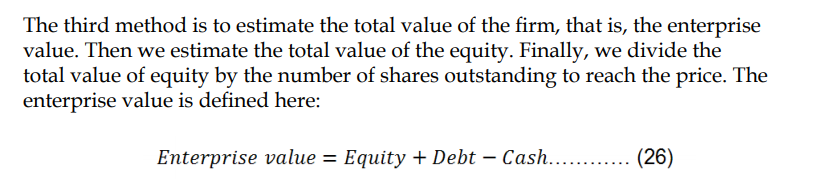

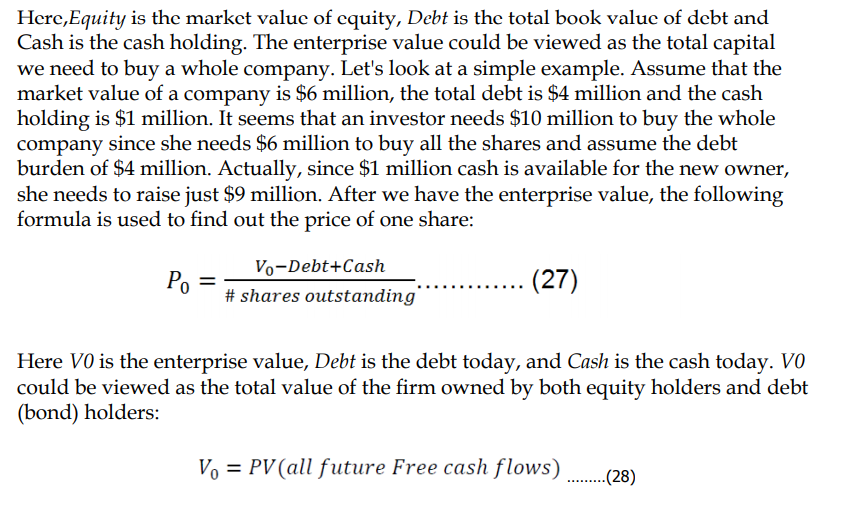

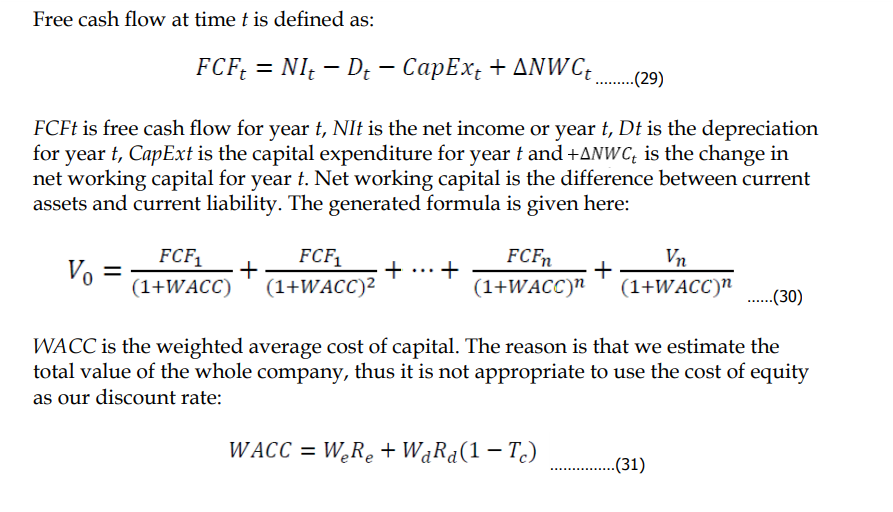

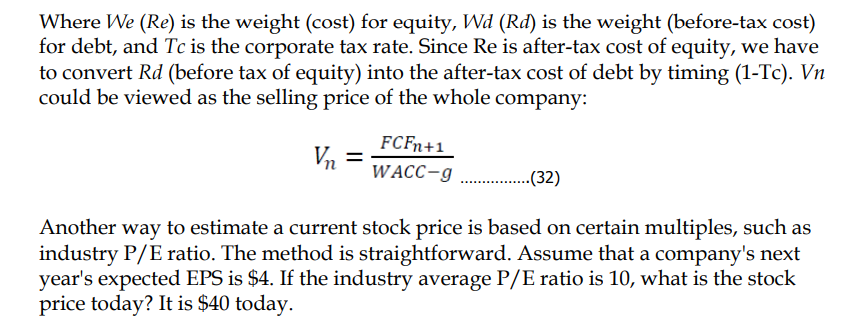

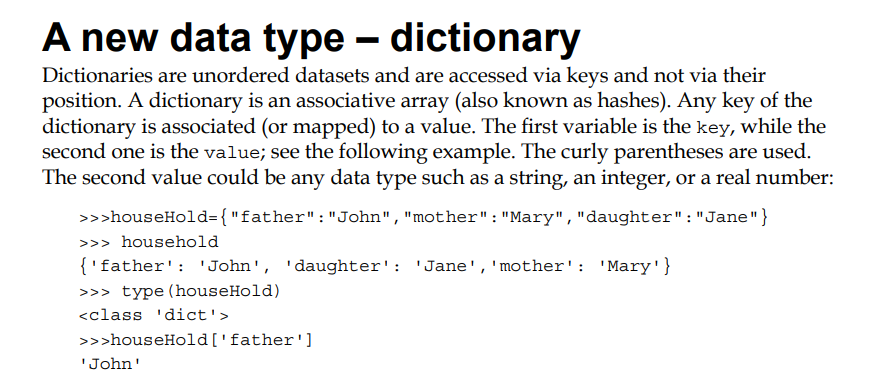

### Summary

In this chapter, we cover various concepts related to interest rates, such as 
* Annual Percentage Rate (APR),
* Effective Annual Rate (EAR), 
* compounding frequency, 
* how to convert one interest rate to another one with different compounding frequencies,
and 
* the term structure of interest rates. 

Then we discussed how to estimate the selling price of a regular bond and how to estimate the **Yield to Maturity (YTM)** and duration. To get a stock price, the so-called discount dividend model could be applied.

In the next chapter, we will discuss CAPM which is probably the most widely used
model in assets pricing. After discussing its basic forms, we show how to download
historical price data for a listed company and market index data. We illustrate how to
estimate returns and run a linear regression to calculate the market risk for the stock